```09/02/2025 - Gabriel A. Amici```

# Evolução temportal da funcção de onda

### Evolução da função de onda de um passo no tempo

O operador hamiltoniano a que está sujeito o sistema é:


$$
    \hat H(t) = \hat H_0 + \hat H_I (t) \tag{1}
$$


onde o $\hat H_I(t)$ é o hamiltoniano de interação, dado por: 


$$
    \hat H_I(t) = \hat R F(t), \tag{2}
$$

e $F(t)$ é o campo elétrico externo:

$$
    F(t) = F_0 \cos(\Omega t), \tag{3}
$$

Para determinar a evolução temporal da função de onda, utilizamos o operador evolução temporal:

$$
    \Psi(r, t) = \hat U(t, t_0) \Psi(r, t_0) \tag{4}
$$

Se fixarmos um intervalo de tempo $\delta = t - t_0$ pequeno, é possível considerar que o hamiltoniano não varia consideravelmente no intervalo, levando à representação de $U$ como:

$$
    \hat U(t, t_0) = e^{-i \bar{H} \delta} \tag{5}
$$

onde $\bar H$ é o valor de $\hat{H}$ avaliado em $\delta/2$.Como o hamiltoniano é composto de duas partes somadas, é possível fazer uma decomposição simétrica de $\hat U$ que fornece uma expressão aproximada para o operador evolução temporal:

$$
    \hat U(t, t_0) \approx e^{-i \hat{H}_0 \delta/2} e^{-i \bar{H}_I \delta} e^{-i \hat{H}_0 \delta/2} \tag{6}
$$

A forma matricial de $\hat{H}_0$ é conhecida através do método *Fourier Grid Hamiltonian*, sendo diagonal na base da energia. Para realizar a evolução temportal intermediária é necessário diagonalizar a matriz associada a $\hat{H}_I(t)$, e para tanto é necessário determinar esta forma matricial:

$$
    \left( H_I \right)_{nm}(t) = F(t)\braket{\varphi_n|\hat R|\varphi_m} = F(t) \Xi_{nm}. \tag{6}
$$

O *bra-ket* pode ser feito utilizando métodos de integração numérica como *Simpson 1/3*.
<!---
utilizando duas relações de completeza na base da posição discretizada, temos:

$$
\begin{align}
    \left( H_I \right)_{nm}(t) &= F(t)\braket{\varphi_n|\hat I \hat R \hat I|\varphi_m} \nonumber \\ 
             &= F(t)\bra{\varphi_n} \left( 
                                            \sum_{j=1}^{N} \ket{r_j} \Delta r \bra{r_j} 
                                    \right)  \hat R 
                                    \left( 
                                            \sum_{k=1}^{N} \ket{r_k} \Delta r \bra{r_k} 
                                    \right) \ket{\varphi_m} \nonumber \\
            &= F(t) \left(\Delta r \right)^2 \sum_{j, k}^{N} \braket{\varphi_n|r_j}\bra{r_j} \hat R \ket{r_k} \braket{r_k|\varphi_m} \nonumber \\
            &= F(t) \left(\Delta r \right)^2 \sum_{j, k}^{N} \braket{\varphi_n|r_j} r_k \frac{\delta_{jk}}{\Delta r} \braket{r_k|\varphi_m} \nonumber \\
            &= F(t) \Delta r \sum_{j}^{N} \braket{\varphi_n|r_j} r_j \braket{r_j|\varphi_m} \tag{7}
\end{align}
$$

Denotando por $\Phi$ a matriz que contém os autovetores de $H_0$, podemos reescrever a expressão anterior como:

$$
    \left( H_I \right)_{nm}(t) = F(t) \Delta r \sum_{j}^{N} \Phi_{jn} r_j \Phi_{mj} = F(t) \Xi_{nm} \tag{8}
$$
--->

A diagonalização dessa matriz é feita calculando seus autovalores e autovetores. Denotando-os por $\lambda_i$ e $\vec v_i$, constitui-se a matriz $S_I$ e $D_I$, que diagonalizam $\Xi$ (e, multiplicando por $F(t)$, diagonalizam $H_I$):

$$
    H_I(t) = S_I D_I(t) S_I^{-1} \tag{9},
$$
onde $S_I$ é a matriz composta dos autovetores $\vec v_i$ e $D_I$ é a matriz diagonal: $\left( D_I \right)_{ij} = \lambda_i \delta_{i_j}$. Assim, podemos voltar à operação necessária que consiste na exponenciação de $H_I$:

$$
    e^{-i \bar{H}_I \delta} = S_I e^{-i \bar{D}_I \delta} S_I^{-1} \tag{10},
$$
onde a barra indica que será avaliado o valor das matrizes no instante $\delta/2$

### Evolução completa

Defidos os requisitos para a evolução por um passo $\delta$ no tempo, é necessário determinar um procedimento para fazer a evolução para intervalos apreciáveis. Define-se um grid no tempo de forma que:

$$
    t_\tau = t_0 + \tau \delta, \hspace{5pt} \tau = 0, 1, ..., N_T,
$$
totalizando um intervalo de tempo de $T = N_T \delta$. No instante $t_0$ consideremos que a função de onda é dada por uma das autofunções de $\hat{H_0}$, $\varphi_n$. A perturbação representada pelo campo externo começa a agir e desejamos descrever as mudanças na função de onda em um instante $t = T$ posterior.

Para cada $t_\tau$ distinto, avaliamos o valor da perturbação no instante intermediário do intervalo:

$$
    \bar H_I(t_\tau) = F(t_\tau + \delta/2) \Xi.
$$

A partir desta matriz são obtidos $\bar D_I$, $\bar S_I$ e pode ser feita a evolução temporal:

$$
    \varphi(t_\tau) = e^{-i H_0 \delta/2} \bar S_I e^{-i \bar{D}_I \delta} \bar S_I^{-1} e^{-i H_0 \delta/2} \varphi(t_{\tau - 1})
$$

In [2]:
from emerald.utils import external_field
from emerald.potentials.msc_potential import MsC_potential, MsC_return_points, MsC_potential_vec
import numpy as np
from numba import njit, prange

In [3]:
# Fourier Grid Hamiltonian

@njit(parallel=True)
def MsC_eigenfunctions(alpha, rm, rM, delta_r):


    L = rM - rm
    N = int(np.ceil(L/delta_r))
    N += int( N % 2 == 0 )
    print(N)
    #print(delta_r)

    E_max = -1/rM

    r_grid = np.linspace(rm, rM, N)

    delta_k = 2*np.pi/L
    n = int((N-1)/2)

    H = np.empty( (N, N) )

    for i in prange(N):
        for j in prange(N):
            l_sum = 0
            for l in prange(0, n):
                l_sum += np.cos( l*(2*np.pi)*(i - j)/(N-1) )*2*(np.pi*l/L)**2
            #print(l_sum)
            H[i, j] = (2/(N-1))*l_sum + MsC_potential(alpha, r_grid[i])*(i == j)
            #print( str( round(H[i, j], 3) ) + " ", end='')
        #print("\n")

    # Find the eigenvalues and eigenvectors
    eig_energies, eig_states = np.linalg.eig(H)

    # Sort eigenvalues and corresponding eigenvectors
    sort_indexes = np.argsort(eig_energies)
    eig_energies = eig_energies[sort_indexes]
    eig_states = eig_states[:, sort_indexes]/np.sqrt(delta_r)

    # Filter eigenvalues less than or equal to E_max and corresponding eigenvectors
    #mask = eig_energies <= E_max
    #eig_energies = eig_energies[mask]
    #eig_states = eig_states[:, mask]
    print(eig_energies)

    return eig_energies, eig_states, r_grid

In [2]:
print(MsC_potential_vec(0.5, np.linspace(0, 10, 10)))

[-2.         -0.82072935 -0.43902439 -0.29668091 -0.22358955 -0.1792754
 -0.1495799  -0.12830658 -0.11232244 -0.09987523]


In [92]:
import numpy as np
from numba import njit, prange
from scipy.linalg import toeplitz

def MsC_eigenfunctions_opt(alpha, rm, rM, delta_r):
    # Grid setup
    L = rM - rm
    N = int(np.ceil(L / delta_r))
    N += int(N % 2 == 0)  # Ensure N is odd
    r_grid = np.linspace(rm, rM, N)
    n = (N - 1) // 2

    # Compute the kinetic energy first row
    l = np.arange(n)
    g = 2 * (np.pi * l / L) ** 2  # g[0] = 0 naturally
    theta = 2 * np.pi / (N - 1)
    k = np.arange(N)
    C = np.cos(l[:, None] * k * theta)  # Shape: (n, N)
    t = (2 / (N - 1)) * np.dot(g, C)  # First row of T

    # Construct Hamiltonian
    T = toeplitz(t)  # Symmetric Toeplitz matrix
    V = np.diag(MsC_potential_vec(alpha, r_grid))  # Diagonal potential
    H = T + V

    print("H calculation done")
    # Eigendecomposition
    eig_energies, eig_states = np.linalg.eigh(H)
    sort_indexes = np.argsort(eig_energies)
    eig_energies = eig_energies[sort_indexes]
    eig_states = eig_states[:, sort_indexes] / np.sqrt(delta_r)

    return eig_energies, eig_states, r_grid

In [5]:
import matplotlib.pyplot as plt

In [62]:
E_max = -0.1

#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)
alpha = 0.5
MsC_energies, MsC_states, r_grid = MsC_eigenfunctions(alpha, MsC_return_points(alpha, 1.e5)[0], 20, 0.025)
N = len(r_grid)



955
[-8.47826445e-01 -1.77873985e-01 -6.91537192e-02 -9.84912556e-03
  7.45921525e-02  1.86911513e-01  3.25295572e-01  4.88731893e-01
  6.76567971e-01  8.88336988e-01  1.12368205e+00  1.38231761e+00
  1.66400774e+00  1.96855319e+00  2.29578335e+00  2.64555115e+00
  3.01772945e+00  3.41220834e+00  3.82889274e+00  4.26770009e+00
  4.72855792e+00  5.21140146e+00  5.71617125e+00  6.24281096e+00
  6.79126554e+00  7.36147985e+00  7.95339788e+00  8.56696244e+00
  9.20211543e+00  9.85879853e+00  1.05369541e+01  1.12365264e+01
  1.19574622e+01  1.26997123e+01  1.34632311e+01  1.42479776e+01
  1.50539145e+01  1.58810079e+01  1.67292263e+01  1.75985395e+01
  1.84889179e+01  1.94003315e+01  2.03327496e+01  2.12861404e+01
  2.22604711e+01  2.32557088e+01  2.42718203e+01  2.53087733e+01
  2.63665368e+01  2.74450814e+01  2.85443798e+01  2.96644064e+01
  3.08051372e+01  3.19665492e+01  3.31486204e+01  3.43513286e+01
  3.55746514e+01  3.68185662e+01  3.80830497e+01  3.93680784e+01
  4.06736288e+01  4.1

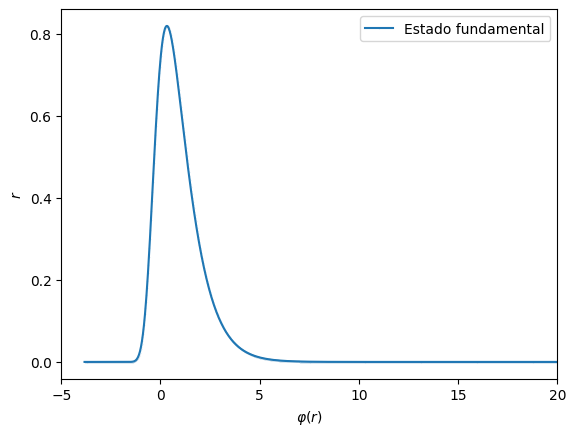

In [63]:

plt.xlabel(r"$\varphi(r)$")
plt.ylabel(r"$r$")
plt.plot(r_grid, MsC_states[:, 0], marker=".", markersize=0.1, label="Estado fundamental")
#plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
#plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
plt.xlim(-5, 20)

plt.legend()
plt.show()

In [8]:
from tqdm import tqdm

In [64]:
# Hamiltoniano de interação

@njit(parallel=True)
def CalculateXi():
    N = len(r_grid)
    dr = r_grid[1] - r_grid[0]

    Xi = np.empty((N, N)) # matriz que representa o braket


    for n in prange(0, N):
        for m in prange(0, N):
            sum1 = sum2 = 0
            for i in prange(0, N):
                r = r_grid[i]
                if i % 2 == 0:
                    sum2 += MsC_states[i, n]*r*MsC_states[i, m]
                else:
                    sum1 += MsC_states[i, n]*r*MsC_states[i, m]

            integral = (dr / 3) * ( 2 * sum2 + 4 * sum1 )
            Xi[n, m] = integral
    return Xi


In [65]:
Xi = CalculateXi()
print(Xi.shape)
print(Xi)
        

(955, 955)
[[ 6.08372256e-01  4.24807889e-01  1.88218918e-01 ...  3.38117426e-04
  -3.17107646e-04  3.81035744e-04]
 [ 4.24807889e-01  4.07812347e+00 -1.47791823e+00 ...  2.90335618e-03
  -2.72323540e-03  3.27026894e-03]
 [ 1.88218918e-01 -1.47791823e+00  9.82672882e+00 ... -6.96589458e-03
   6.55456631e-03 -7.77431247e-03]
 ...
 [ 3.38117426e-04  2.90335618e-03 -6.96589458e-03 ... -2.83626539e+00
  -5.65403536e-01  1.37353551e-01]
 [-3.17107646e-04 -2.72323540e-03  6.55456631e-03 ... -5.65403536e-01
  -4.77710017e+00  5.43929718e-01]
 [ 3.81035744e-04  3.27026894e-03 -7.77431247e-03 ...  1.37353551e-01
   5.43929718e-01 -2.66255090e+00]]


In [29]:
Xi = CalculateXi()
print(Xi.shape)
print(Xi)
        

(2383, 2383)
[[ 6.09138471e-01  4.25342981e-01  1.88502109e-01 ...  1.85729531e-03
   1.61991302e-03 -2.56258887e-03]
 [ 4.25342981e-01  4.08325884e+00 -1.48004367e+00 ...  1.59400036e-02
   1.39042935e-02 -2.19882967e-02]
 [ 1.88502109e-01 -1.48004367e+00  9.83662443e+00 ... -3.83373522e-02
  -3.35604970e-02  5.28006604e-02]
 ...
 [ 1.85729531e-03  1.59400036e-02 -3.83373522e-02 ... -3.48587751e+00
  -2.68268835e-01 -3.70332282e-01]
 [ 1.61991302e-03  1.39042935e-02 -3.35604970e-02 ... -2.68268835e-01
  -3.45647257e+00  4.16453379e-01]
 [-2.56258887e-03 -2.19882967e-02  5.28006604e-02 ... -3.70332282e-01
   4.16453379e-01 -3.19227352e+00]]


In [66]:
#Diagonalizar o Xi

Xi_values, Xi_vectors = np.linalg.eig(Xi)

Xi_diag = np.diag(Xi_values)

print( Xi_vectors@Xi_diag@np.linalg.inv(Xi_vectors) )

print(Xi_diag)

[[ 6.08372256e-01  4.24807889e-01  1.88218918e-01 ...  3.38117427e-04
  -3.17107646e-04  3.81035744e-04]
 [ 4.24807889e-01  4.07812347e+00 -1.47791823e+00 ...  2.90335618e-03
  -2.72323540e-03  3.27026894e-03]
 [ 1.88218918e-01 -1.47791823e+00  9.82672882e+00 ... -6.96589458e-03
   6.55456631e-03 -7.77431247e-03]
 ...
 [ 3.38117426e-04  2.90335618e-03 -6.96589458e-03 ... -2.83626539e+00
  -5.65403536e-01  1.37353551e-01]
 [-3.17107646e-04 -2.72323540e-03  6.55456631e-03 ... -5.65403536e-01
  -4.77710017e+00  5.43929718e-01]
 [ 3.81035744e-04  3.27026894e-03 -7.77431247e-03 ...  1.37353551e-01
   5.43929718e-01 -2.66255090e+00]]
[[26.60938948  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         26.54284277  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         26.47629607 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  4.96972038  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          5.43554729
 

In [31]:
#exponencial de Xi
#numpy não implementa algoritmo próprio de exponenciação matricial
#print(np.expm1(Xi))

In [67]:
Xi_values, Xi_vectors = np.linalg.eig(Xi)
print( Xi_vectors@np.diag(np.exp(Xi_values))@np.linalg.inv(Xi_vectors) )

[[ 2.88987972e+00  1.26987017e+01 -2.93210602e+01 ...  9.46647918e-02
  -8.82138301e-02  8.77457728e-02]
 [ 1.26987017e+01  1.38848713e+05 -5.12394441e+06 ...  3.46020278e+04
  -3.07012998e+04  8.34109717e+02]
 [-2.93210603e+01 -5.12394441e+06  2.17652392e+08 ... -1.60048569e+06
   1.40403742e+06  3.19939937e+05]
 ...
 [ 9.46644072e-02  3.46020278e+04 -1.60048569e+06 ...  4.93215960e+05
  -3.76554682e+05  6.61350633e+06]
 [-8.82135780e-02 -3.07012998e+04  1.40403742e+06 ... -3.76554682e+05
   3.51093575e+05 -4.08961640e+06]
 [ 8.77396095e-02  8.34109715e+02  3.19939937e+05 ...  6.61350633e+06
  -4.08961640e+06  1.05539533e+08]]


In [68]:
import scipy as scy

print(scy.linalg.expm(Xi))

[[ 2.88987972e+00  1.26987017e+01 -2.93210604e+01 ...  9.46647551e-02
  -8.82138351e-02  8.77446870e-02]
 [ 1.26987017e+01  1.38848713e+05 -5.12394441e+06 ...  3.46020278e+04
  -3.07012998e+04  8.34109717e+02]
 [-2.93210604e+01 -5.12394441e+06  2.17652392e+08 ... -1.60048569e+06
   1.40403742e+06  3.19939937e+05]
 ...
 [ 9.46647551e-02  3.46020278e+04 -1.60048569e+06 ...  4.93215960e+05
  -3.76554682e+05  6.61350633e+06]
 [-8.82138351e-02 -3.07012998e+04  1.40403742e+06 ... -3.76554682e+05
   3.51093575e+05 -4.08961640e+06]
 [ 8.77446862e-02  8.34109717e+02  3.19939937e+05 ...  6.61350633e+06
  -4.08961640e+06  1.05539533e+08]]


In [69]:
t_0 = np.pi/2
Omg = 1
F_0 = 1.e-2

N = len(r_grid)

delta_t = 0.01

final_time = 1

N_T = int(final_time/delta_t)

wavefunc_history = np.empty( (N, N_T) )
wavefunc_history[:, 0] = MsC_states[:, 0]

H_0 = np.diag(MsC_energies) #matriz H0
exp_HI_bar = Xi_vectors@np.diag(np.exp( -1j*external_field(F_0, Omg, delta_t/2)*delta_t*Xi_values))@np.linalg.inv(Xi_vectors) #matrix exp(\bar H_I delta)
exp_H0 = np.diag( np.exp( -1j*MsC_energies*delta_t/2 ) )

#new_wavefunc = exp_H0@exp_HI_bar@exp_H0@MsC_states[:, 0]
new_wavefunc = MsC_states[:, 0]

In [57]:
new_wavefunc_history = np.empty((N, 200))
new_wavefunc_history[:, :100] = wavefunc_history

In [58]:
original_wavefunc_history = wavefunc_history.copy()
wavefunc_history = new_wavefunc_history

In [70]:
for tau in tqdm(range(1, 100)):
    time = t_0 + tau*delta_t
    exp_HI_bar = Xi_vectors@np.diag(np.exp( -1j*external_field(F_0, Omg, time + delta_t/2)*delta_t*Xi_values))@np.linalg.inv(Xi_vectors) #matrix exp(\bar H_I delta)
    exp_H0 = np.diag( np.exp( -1j*MsC_energies*delta_t/2 ) )

    new_wavefunc = exp_H0@exp_HI_bar@exp_H0@new_wavefunc
    wavefunc_history[:, tau] = new_wavefunc.copy()

  0%|          | 0/99 [00:00<?, ?it/s]/tmp/ipykernel_11088/2955099779.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  wavefunc_history[:, tau] = new_wavefunc.copy()
100%|██████████| 99/99 [00:35<00:00,  2.81it/s]


In [36]:
new_wavefunc = exp_H0@exp_HI_bar@exp_H0@new_wavefunc

In [51]:
print(new_wavefunc)

[-1.40955910e-04-9.42128536e-05j -1.04366598e-04-3.39043461e-05j
 -4.98233874e-05-3.19946968e-05j ...  1.10791539e-06-1.42762155e-06j
  2.33392098e-07-3.48625985e-07j -2.67742990e-06+4.15535937e-06j]


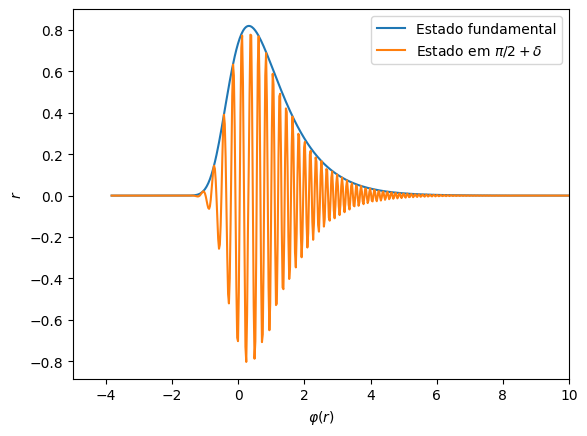

In [71]:
plt.xlabel(r"$\varphi(r)$")
plt.ylabel(r"$r$")
plt.plot(r_grid, MsC_states[:, 0], label="Estado fundamental")
plt.plot(r_grid, wavefunc_history[:, 19], label=r"Estado em $\pi/2 + \delta$")
#plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
#plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
plt.xlim(-5, 10)

plt.legend()
plt.show()

In [35]:
from matplotlib.animation import FuncAnimation
from scipy.special import genlaguerre

In [72]:
def Lag(n, x):
    """
    Associated Laguerre polynomial L^1_{n-1}(x)
    """
    # L_n-1^1 is a generalized Laguerre polynomial with alpha=1
    return genlaguerre(n-1, 1)(x)


def Coulomb_eigenfunction(r, n):
    """
    Computes the Coulomb wavefunction φ_n(r)
    """
    # Pre-factor
    if r <= 0:
        return 0
    prefactor = (2 * r) / np.sqrt(n**5)
    
    # Exponential term
    exp_term = np.exp(-r/n)
    
    # Laguerre polynomial term
    laguerre_term = Lag(n, 2 * r / n)
    
    # Complete wavefunction
    return prefactor * exp_term * laguerre_term

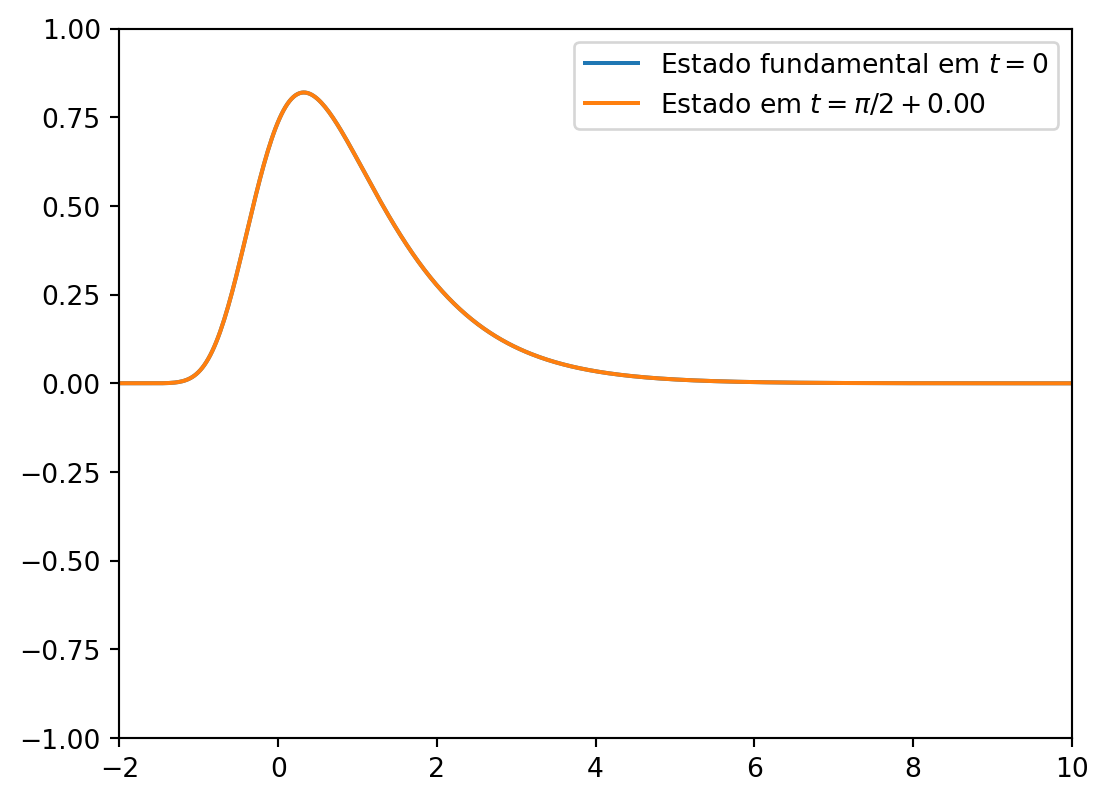

In [74]:
fig, ax = plt.subplots()

fig.set_dpi(192)

cv1 = ax.plot(r_grid, MsC_states[:, 0], label="Estado fundamental em $t = 0$")
cv2, = ax.plot(r_grid, wavefunc_history[:, 0], label=r"Estado em $t = \pi/2 + 0.00 ~$")
#cv3 = ax.plot(r_grid, [-Coulomb_eigenfunction(r, 3) for r in r_grid], label=" 1º Estado excitado")

def update(frame):
    cv2.set_ydata(wavefunc_history[:, frame])  
    cv2.set_label(r"Estado em $t = \pi/2 + {:.2f} ~$".format(round(frame*delta_t, 2)))
    ax.legend()
    return cv2,

ani = FuncAnimation(fig, update, frames=100, interval=2000, blit=True)
ax.set_xlim(-2, 10)
ax.legend()
ax.set_ylim(-1, 1)
plt.show()



In [75]:
ani.save('test2.mp4', writer='ffmpeg', fps=15)

In [1]:
import time

In [4]:
import numpy as np
from numba import njit, prange
from numba_progress import ProgressBar

In [5]:
@njit(parallel=True)
def MsC_interaction_matrix(position_grid, states):
    N = len(position_grid)
    dr = position_grid[1] - position_grid[0]

    Xi = np.empty((N, N)) # matriz que representa o braket


    for n in prange(0, N):
        for m in prange(0, N):
            sum1 = sum2 = 0
            for i in prange(0, N):
                r = position_grid[i]
                if i % 2 == 0:
                    sum2 += states[i, n]*r*states[i, m]
                else:
                    sum1 += states[i, n]*r*states[i, m]

            integral = (dr / 3) * ( 2 * sum2 + 4 * sum1 )
            Xi[n, m] = integral
    print(Xi)
    return Xi

In [4]:
@njit
def MsC_interaction_matrix_opt(position_grid, states):
    N = len(position_grid)
    dr = position_grid[1] - position_grid[0]
    
    # Compute weights as in your original code
    w = np.full(N, 2.0)
    w[1::2] = 4.0
    w[0] = 1.0
    w[-1] = 1.0
    
    # Efficient matrix computation
    temp = (w * position_grid)[:, None] * states
    Xi = (dr / 3) * np.dot(states.T, temp)
    
    print(Xi)
    return Xi

In [5]:
@njit
def diagonalize_matrix(M):
    M_values, M_vectors = np.linalg.eig(M)
    return M_vectors, M_values, np.linalg.inv(M_vectors)

In [7]:
@njit
def MsC_wavefunction_update(time_grid, MsC_energies, initial_state, Xi_diag, Xi_vectors, Xi_inv, F_0, Omg):
    N = len(initial_state)
    N_T = len(time_grid)
    delta_t = time_grid[1] - time_grid[0]
    t_0 = time_grid[0]

    print("start")
    wavefunc_history = np.empty( (N, N_T), dtype=np.complex128 )
    wavefunc_history[:, 0] = initial_state.astype(np.complex128)

    H_0 = np.diag(MsC_energies) #matriz H0
    exp_H0 = np.diag(np.exp( -1j*MsC_energies*delta_t/2 ))

    new_wavefunc = initial_state.astype(np.complex128)

    for tau in range(1, N_T):
        t = time_grid[tau]
        exp_HI_bar = Xi_vectors@np.diag( np.exp( -1j*external_field(F_0, Omg, t + delta_t/2)*Xi_diag*delta_t))@Xi_inv #matrix exp(\bar H_I delta)
        #exp_HI_bar = Xi_vectors@np.diag(np.exp( -1j*external_field(F_0, Omg, time + delta_t/2)*delta_t*Xi_values))@np.linalg.inv(Xi_vectors) #matrix exp(\bar H_I delta)

        new_wavefunc = exp_H0@exp_HI_bar@exp_H0@new_wavefunc
        wavefunc_history[:, tau] = new_wavefunc.copy()
        
    return wavefunc_history

In [11]:
@njit(parallel=True)
def MsC_wavefunction_update_handmade(time_grid, MsC_energies, initial_state, Xi_values, Xi_vectors, Xi_inv, F_0, Omg):
    N = len(initial_state)
    N_T = len(time_grid)
    delta_t = time_grid[1] - time_grid[0]
    #t_0 = time_grid[0]

    print("start")
    wavefunc_history = np.empty( (N, N_T), dtype=np.complex128 )
    wavefunc_history[:, 0] = initial_state.astype(np.complex128)

    #H_0 = np.diag(MsC_energies) #matriz H0
    exp_H0 = np.exp( -1j*MsC_energies*delta_t/2 )

    new_wavefunc = initial_state.astype(np.complex128)
    temp_wavefunc = np.empty(N, dtype=np.complex128)

    for tau in range(1, N_T):
        t = time_grid[tau]
        exp_Xi = np.exp( -1j*external_field(F_0, Omg, t + delta_t/2)*Xi_values*delta_t)
        
        for i in prange(N): #multiplicacao por exp(H_0)
            temp_wavefunc[i] = wavefunc_history[i, tau-1]*exp_H0[i]
        
        temp_wavefunc2 = temp_wavefunc.copy()
        
        for i2 in prange(N): #multiplicacao por S⁻¹
            summ = 0
            for i3 in prange(N):
                summ += temp_wavefunc2[i3]*Xi_inv[i2, i3]
            temp_wavefunc[i2] = summ
        

        for i in prange(N): #multiplicacao por exp(D(t))
            temp_wavefunc[i] *= exp_Xi[i]
        
        temp_wavefunc2 = temp_wavefunc.copy()

        for i2 in prange(N): #multiplicacao por S
            summ = 0
            for i3 in prange(N):
                summ += temp_wavefunc2[i3]*Xi_vectors[i2, i3]
            temp_wavefunc[i2] = summ

        for i in prange(N): #multiplicacao por exp(H0)
            temp_wavefunc[i] *= exp_H0[i]

        wavefunc_history[:, tau] = temp_wavefunc.copy()

    return wavefunc_history



    

In [49]:
from tqdm import tqdm

In [50]:

def MsC_wavefunction_update_handmade_2(time_grid, MsC_energies, initial_state, Xi_values, Xi_vectors, Xi_inv, F_0, Omg):
    N = len(initial_state)
    N_T = len(time_grid)
    delta_t = time_grid[1] - time_grid[0]
    #t_0 = time_grid[0]

    print("start")
    wavefunc_history = np.empty( (N, N_T), dtype=np.complex128 )
    wavefunc_history[:, 0] = initial_state.astype(np.complex128)

    #H_0 = np.diag(MsC_energies) #matriz H0
    exp_H0 = np.exp( -1j*MsC_energies*delta_t/2 )

    new_wavefunc = initial_state.astype(np.complex128)
    temp_wavefunc = np.empty(N, dtype=np.complex128)

    for tau in tqdm(range(1, N_T)):
        t = time_grid[tau]
        exp_Xi = np.exp( -1j*external_field(F_0, Omg, t + delta_t/2)*Xi_values*delta_t)
        
        '''
        for i in prange(N): #multiplicacao por exp(H_0)
            temp_wavefunc[i] = wavefunc_history[i, tau-1]*exp_H0[i]'
        '''
        
        temp_wavefunc = exp_H0*wavefunc_history[:, tau-1] #multiplicação pela exp(H0)
        #print(temp_wavefunc)
        #temp_wavefunc2 = temp_wavefunc.copy()

        #print(Xi_inv.shape, temp_wavefunc2.shape)
        temp_wavefunc = Xi_inv@temp_wavefunc #multiplicação pela inversa dos autovetores de Xi
        
        #temp_wavefunc2 = temp_wavefunc.copy()

        temp_wavefunc *= exp_Xi #multiplicação pelo exponencial da Xi diagonalizada
        
        #temp_wavefunc2 = temp_wavefunc.copy()

        temp_wavefunc = Xi_vectors@temp_wavefunc #multiplicação pelos autovetores de Xi

        #temp_wavefunc2 = temp_wavefunc.copy()

        temp_wavefunc *= exp_H0

        wavefunc_history[:, tau] = temp_wavefunc.copy()

    return wavefunc_history



    

In [105]:
arr_A = np.array([1, 2, 3, 4, 5])
arr_B = np.array([9, 8, 7, 6, 5, -5, -6, -7, -8])
matrixC = np.exp(2*arr_A)


print(matrixC*arr_A)

[7.38905610e+00 1.09196300e+02 1.21028638e+03 1.19238319e+04
 1.10132329e+05]


In [106]:

def MsC_wavefunction_unperturbed_evolution(time_grid, MsC_energies, initial_state):
    N = len(initial_state)
    N_T = len(time_grid)
    delta_t = time_grid[1] - time_grid[0]
    #t_0 = time_grid[0]

    print("start")
    wavefunc_history = np.empty( (N, N_T), dtype=np.complex128 )
    wavefunc_history[:, 0] = initial_state.astype(np.complex128)

    #H_0 = np.diag(MsC_energies) #matriz H0
    exp_H0 = np.exp( -1j*MsC_energies*delta_t )

    temp_wavefunc = np.empty(N, dtype=np.complex128)

    for tau in tqdm(range(1, N_T)):
        wavefunc_history[:, tau] = exp_H0*wavefunc_history[:, tau-1] #multiplicação pela exp(H0)
    return wavefunc_history

In [8]:
@njit
def MsC_evolve_wavefunction(alpha, position_grid, time_grid, F_0, Omg, n=0):


    delta_r = position_grid[1] - position_grid[0]


    #start_time = time.time()

    #Passo 1: Calcular o hamiltoniano utilizando Fourier Grid Hamiltonian
    MsC_energies, MsC_states, position_grid = MsC_eigenfunctions(alpha, position_grid[0], position_grid[-1], delta_r)
    
    #end_time = time.time()
    print("Calculo do hamiltoniano finalizado")#: {:.1f} segundos".format(end_time-start_time))


    #start_time = time.time()

    #Passo 2: calcular a matriz Xi
    Xi = MsC_interaction_matrix(position_grid, MsC_states)

    #end_time = time.time()
    print("Calculo da matriz de interacao finalizado")#: {:.1f} segundos".format(end_time-start_time))

    
    #start_time = time.time()

    #passo 3: diagonalizar o Xi
    Xi_vectors, Xi_diag, Xi_inv = diagonalize_matrix(Xi)
    
    #end_time = time.time()
    print("Diagonalizacao da matriz de interacao finalizada")#: {:.1f} segundos".format(end_time-start_time))


    #start_time = time.time()

    #Passo 4: Evolucao temporal:
    wavefunction_history = MsC_wavefunction_update(time_grid, MsC_energies, MsC_states[:, n], Xi_diag.astype(np.complex128), Xi_vectors.astype(np.complex128), Xi_inv.astype(np.complex128), F_0, Omg)

    #end_time = time.time()
    print("Evolucao temporal finalizada")#: {:.1f} segundos, {:.2f} segundos por passo no tempo".format(end_time-start_time, (end_time-start_time)/len(time_grid)))

    return wavefunction_history


    



    

In [7]:
import time

In [46]:
alpha = 0.5

position_grid = np.arange( MsC_return_points(alpha, 1.e5)[0], 100, 0.015 )
time_grid = np.arange(np.pi/2, np.pi/2 + 2.01, 0.01)

delta_r = position_grid[1] - position_grid[0]


start_time = time.time()

#Passo 1: Calcular o hamiltoniano utilizando Fourier Grid Hamiltonian
MsC_energies, MsC_states, position_grid = MsC_eigenfunctions_opt(alpha, position_grid[0], position_grid[-1], delta_r)

end_time = time.time()
print("Calculo do hamiltoniano finalizado: {:.1f} segundos".format(end_time-start_time))


start_time = time.time()

#Passo 2: calcular a matriz Xi
Xi = MsC_interaction_matrix_opt(position_grid, MsC_states)

end_time = time.time()
print("Calculo da matriz de interacao finalizado: {:.1f} segundos".format(end_time-start_time))


start_time = time.time()

#passo 3: diagonalizar o Xi
Xi_vectors, Xi_diag, Xi_inv = diagonalize_matrix(Xi)

end_time = time.time()
print("Diagonalizacao da matriz de interacao finalizada: {:.1f} segundos".format(end_time-start_time))


#start_time = time.time()

H calculation done
Calculo do hamiltoniano finalizado: 302.1 segundos
[[ 6.09008369e-01  4.25249165e-01  1.77702642e-01 ...  1.69343975e-04
   1.59750389e-04 -2.75822987e-04]
 [ 4.25249165e-01  4.08249997e+00 -1.41682515e+00 ...  1.46738779e-03
   1.38411007e-03 -2.38913065e-03]
 [ 1.77702642e-01 -1.41682515e+00  1.05402249e+01 ... -4.73132575e-03
  -4.46257114e-03  7.70191400e-03]
 ...
 [ 1.69343975e-04  1.46738779e-03 -4.73132575e-03 ... -4.19259649e+00
  -3.62458212e-01 -1.07545279e+00]
 [ 1.59750389e-04  1.38411007e-03 -4.46257114e-03 ... -3.62458212e-01
  -2.68809114e+00  1.33497579e+00]
 [-2.75822987e-04 -2.38913065e-03  7.70191400e-03 ... -1.07545279e+00
   1.33497579e+00 -2.25908457e+00]]
Calculo da matriz de interacao finalizado: 10.6 segundos
Diagonalizacao da matriz de interacao finalizada: 311.0 segundos


In [93]:
start_time = time.time()

#Passo 1: Calcular o hamiltoniano utilizando Fourier Grid Hamiltonian
MsC_energies, MsC_states, position_grid = MsC_eigenfunctions_opt(alpha, position_grid[0], position_grid[-1], delta_r)

end_time = time.time()
print("Calculo do hamiltoniano finalizado: {:.1f} segundos".format(end_time-start_time))

H calculation done
Calculo do hamiltoniano finalizado: 59.7 segundos


In [148]:
print(MsC_energies.shape)

(6921,)


In [53]:
start_time = time.time()

#Passo 2: calcular a matriz Xi
Xi_opt = MsC_interaction_matrix_opt(position_grid, MsC_states)

end_time = time.time()
print("Calculo da matriz de interacao finalizado: {:.1f} segundos!!".format(end_time-start_time))

start_time = time.time()

#Passo 2: calcular a matriz Xi
Xi_opt = MsC_interaction_matrix_opt(position_grid, MsC_states)

end_time = time.time()
print("Calculo da matriz de interacao finalizado: {:.1f} segundos!!".format(end_time-start_time))

[[ 6.09067040e-01  4.25290130e-01  1.77719764e-01 ... -7.67038948e-05
  -7.19665052e-05  8.65215742e-05]
 [ 4.25290130e-01  4.08289323e+00 -1.41696163e+00 ... -6.66612019e-04
  -6.25336100e-04  7.51666564e-04]
 [ 1.77719764e-01 -1.41696163e+00  1.05412402e+01 ...  2.15269343e-03
   2.01924750e-03 -2.42696977e-03]
 ...
 [-7.67038948e-05 -6.66612019e-04  2.15269343e-03 ... -2.83964084e+00
   5.67236049e-01 -1.37866668e-01]
 [-7.19665052e-05 -6.25336100e-04  2.01924750e-03 ...  5.67236049e-01
  -4.70596014e+00  8.34427395e-01]
 [ 8.65215742e-05  7.51666564e-04 -2.42696977e-03 ... -1.37866668e-01
   8.34427395e-01 -1.41379249e+00]]
Calculo da matriz de interacao finalizado: 2.9 segundos!!
[[ 6.09067040e-01  4.25290130e-01  1.77719764e-01 ... -7.67038948e-05
  -7.19665052e-05  8.65215742e-05]
 [ 4.25290130e-01  4.08289323e+00 -1.41696163e+00 ... -6.66612019e-04
  -6.25336100e-04  7.51666564e-04]
 [ 1.77719764e-01 -1.41696163e+00  1.05412402e+01 ...  2.15269343e-03
   2.01924750e-03 -2.42696

In [43]:
print(np.sum(np.abs(Xi_opt-Xi)))

3.939437162822029e-09


In [133]:
time_grid = np.arange(np.pi/2, np.pi/2 + 1.501, 0.001)
print(time_grid.shape)
delta_t = time_grid[1] - time_grid[0]

(1501,)


In [66]:
F_0 = 1.e-2 ; Omg = 1

#Passo 4: Evolucao temporal:
wavefunc_history = MsC_wavefunction_update(time_grid, MsC_energies, MsC_states[:, 0], Xi_diag.astype(np.complex128), Xi_vectors.astype(np.complex128), Xi_inv.astype(np.complex128), F_0, Omg)

#end_time = time.time()
print("Evolucao temporal finalizada")#: {:.1f} segundos, {:.2f} segundos por passo no tempo".format(end_time-start_time, (end_time-start_time)/len(time_grid)))


NameError: name 'MsC_wavefunction_update' is not defined

In [12]:
F_0 = 1.e-2 ; Omg = 1

#Passo 4: Evolucao temporal:
wavefunc_history_handmade = MsC_wavefunction_update_handmade(time_grid, MsC_energies, MsC_states[:, 0], Xi_diag.astype(np.complex128), Xi_vectors.astype(np.complex128), Xi_inv.astype(np.complex128), F_0, Omg)

#end_time = time.time()
print("Evolucao temporal finalizada")#: {:.1f} segundos, {:.2f} segundos por passo no tempo".format(end_time-start_time, (end_time-start_time)/len(time_grid)))


start
Evolucao temporal finalizada


In [145]:
F_0 = 0.05 ; Omg = 2

#Passo 4: Evolucao temporal:
wavefunc_history_handmade_3 = MsC_wavefunction_update_handmade_2(time_grid, MsC_energies, MsC_states[:, 0], Xi_diag.astype(np.complex128), Xi_vectors.astype(np.complex128), Xi_inv.astype(np.complex128), F_0, Omg)

#end_time = time.time()
print("Evolucao temporal finalizada")#: {:.1f} segundos, {:.2f} segundos por passo no tempo".format(end_time-start_time, (end_time-start_time)/len(time_grid)))


start


100%|██████████| 1500/1500 [02:02<00:00, 12.27it/s]

Evolucao temporal finalizada


In [135]:
F_0 = 1.e-2 ; Omg = 1

#Passo 4: Evolucao temporal:
unperturbed_wavefunc_history = MsC_wavefunction_unperturbed_evolution(time_grid, MsC_energies, MsC_states[:, 0])

#end_time = time.time()
print("Evolucao temporal finalizada")#: {:.1f} segundos, {:.2f} segundos por passo no tempo".format(end_time-start_time, (end_time-start_time)/len(time_grid)))


start


  0%|          | 0/1500 [00:00<?, ?it/s]

100%|██████████| 1500/1500 [00:00<00:00, 19367.80it/s]

Evolucao temporal finalizada


In [60]:
print(wavefunc_history_handmade_3.shape)
print(position_grid.shape)

(6921, 1001)
(6921,)


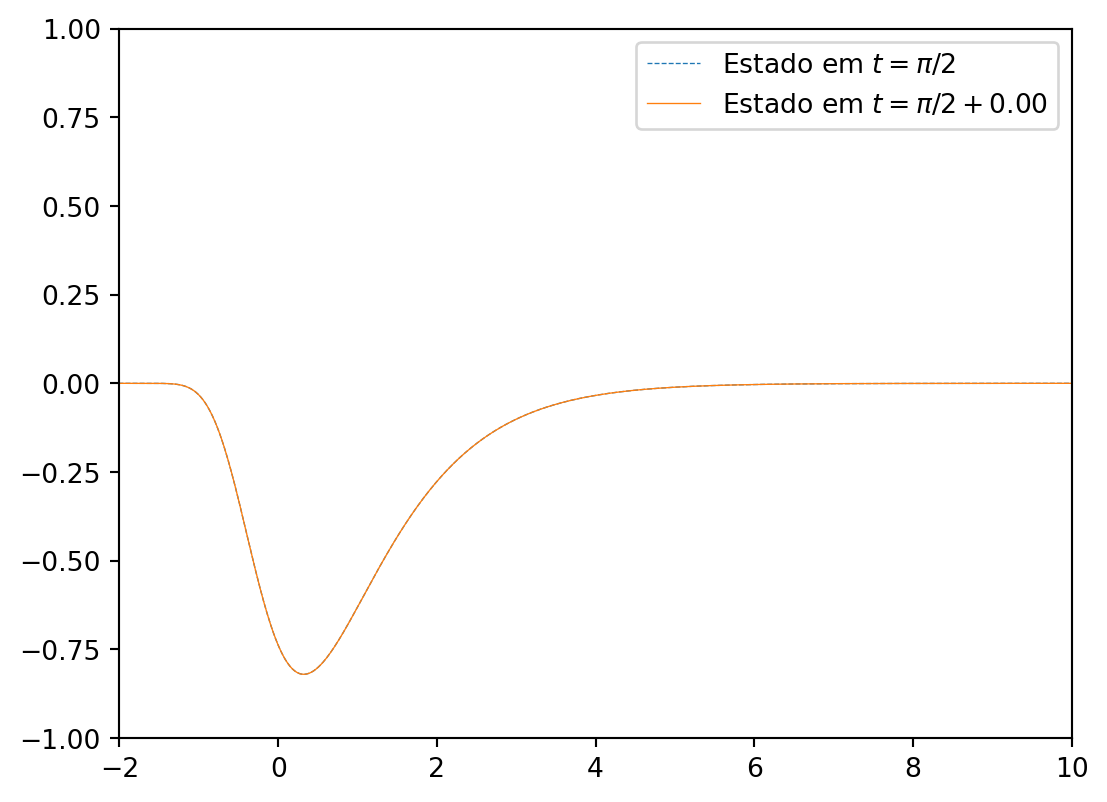

In [141]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

fig.set_dpi(192)

cv1 = ax.plot(position_grid, unperturbed_wavefunc_history[:, 0], label=r"Estado em $t = \pi/2$", lw=0.5, ls="dashed")
cv2, = ax.plot(position_grid, unperturbed_wavefunc_history[:, 0], label=r"Estado em $t = \pi/2 + 0.00 ~$", lw=0.5)
#cv3 = ax.plot(r_grid, [-Coulomb_eigenfunction(r, 3) for r in r_grid], label=" 1º Estado excitado")

def update(frame):
    cv2.set_ydata(unperturbed_wavefunc_history[:, frame])  
    cv2.set_label(r"Estado em $t = \pi/2 + {:.2f} ~$".format(round(frame*delta_t, 2)))
    ax.legend()
    return cv2,

ani = FuncAnimation(fig, update, frames=1501, interval=2000, blit=True)
ax.set_xlim(-2, 10)
ax.legend()
ax.set_ylim(-1, 1)
plt.show()



In [142]:
ani.save('test16-unperturbed.mp4', writer='ffmpeg', fps=30)

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


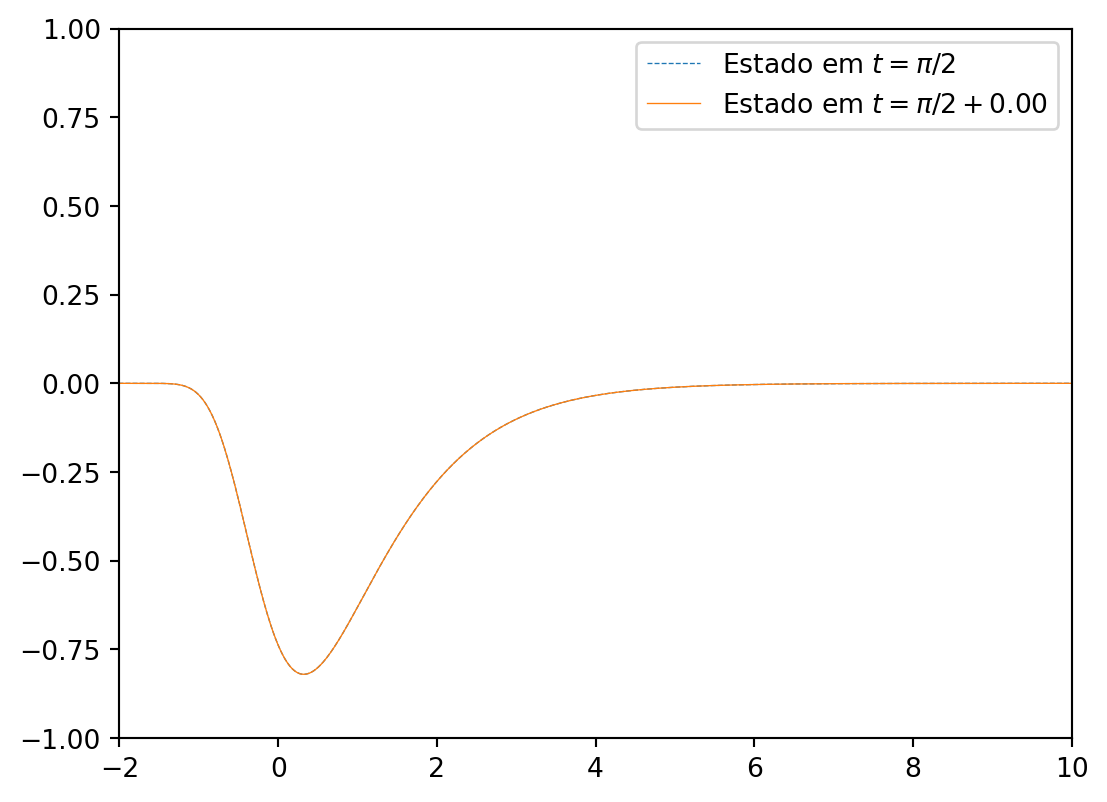

In [146]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

fig.set_dpi(192)

cv1 = ax.plot(position_grid, wavefunc_history_handmade_3[:, 0], label=r"Estado em $t = \pi/2$", lw=0.5, ls="dashed")
cv2, = ax.plot(position_grid, wavefunc_history_handmade_3[:, 0], label=r"Estado em $t = \pi/2 + 0.00 ~$", lw=0.5)
#cv3 = ax.plot(r_grid, [-Coulomb_eigenfunction(r, 3) for r in r_grid], label=" 1º Estado excitado")

def update(frame):
    cv2.set_ydata(wavefunc_history_handmade_3[:, frame])  
    cv2.set_label(r"Estado em $t = \pi/2 + {:.2f} ~$".format(round(frame*delta_t, 2)))
    ax.legend()
    return cv2,

ani = FuncAnimation(fig, update, frames=1501, interval=2000, blit=True)
ax.set_xlim(-2, 10)
ax.legend()
ax.set_ylim(-1, 1)
plt.show()



In [115]:
print(np.max(unperturbed_wavefunc_history-wavefunc_history_handmade_3))

(0.7763743660755373-0.05462678280943087j)


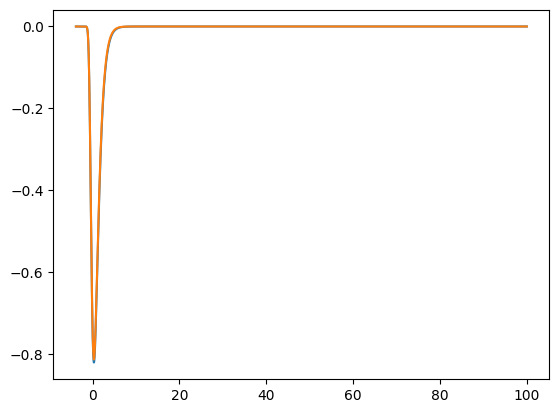

In [34]:
plt.plot(position_grid, wavefunc_history[:, 0].real)
plt.plot(position_grid, wavefunc_history[:, 1].real)
plt.show()

In [147]:
ani.save('test16-perturbed.mp4', writer='ffmpeg', fps=30)

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [33]:
import json

json.dump([list(x.real) for x in wavefunc_history], open("teste3.json", "w"))

In [23]:
#print(wavefunc_history_handmade)
print("\n"*3)
#print(wavefunc_history)

print(np.sum(wavefunc_history-wavefunc_history_handmade))





(1.657060982478092e-14-1.4141658743528894e-13j)


In [1]:
import numpy as np

In [ ]:
from emerald.quantum.msc_unperturbed import MsC_hamiltonian, MsC_eigstates
from emerald.quantum.coupling_utils import wavefunction_stationary_evolution
from emerald.quantum.coupling_utils import *

position_grid = np.linspace(-2, 100, 10201)

H_0, position_grid = MsC_hamiltonian(0.5, position_grid)
msc_energies, msc_states = MsC_eigstates(H_0, position_grid)

Xi_vectors, Xi_values, Xi_inv = MsC_interaction_matrix(position_grid, msc_states)

In [ ]:
sigma = 1
mu = 15

#initial_state = (2*np.pi*sigma**2)**(-1/2)*np.exp( -((position_grid-mu)**2)/(2*sigma) )
initial_state = msc_states[:, 0]

time_grid = np.arange(np.pi/2, np.pi/2 + 2, 0.05)

wavefunc_unperturbed = wavefunction_stationary_evolution(time_grid, msc_energies, initial_state)
wavefunc_perturbed = wavefunction_evolution(time_grid, msc_energies, initial_state, Xi_values, Xi_vectors, Xi_inv, 0.1, 1)

100%|██████████| 39/39 [02:02<00:00,  3.13s/it]


/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


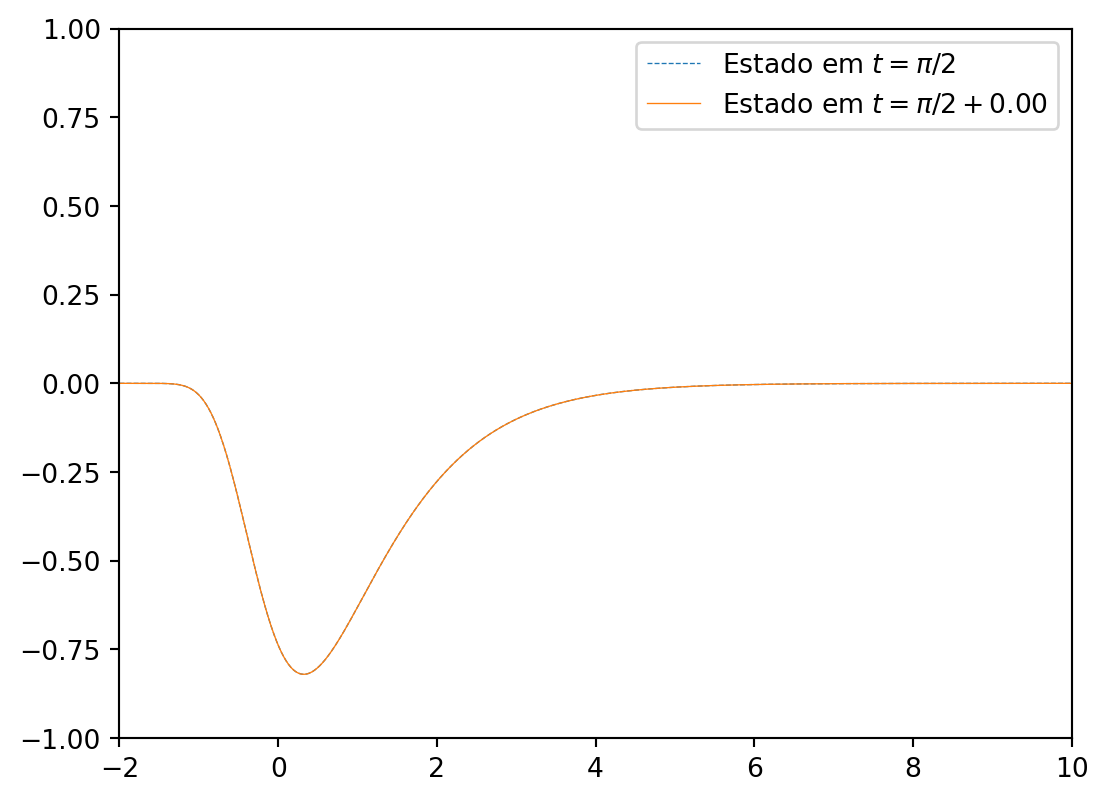

In [27]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

fig.set_dpi(192)

cv1 = ax.plot(position_grid, wavefunc_perturbed[:, 0], label=r"Estado em $t = \pi/2$", lw=0.5, ls="dashed")
cv2, = ax.plot(position_grid, wavefunc_perturbed[:, 0], label=r"Estado em $t = \pi/2 + 0.00 ~$", lw=0.5)
#cv3 = ax.plot(r_grid, [-Coulomb_eigenfunction(r, 3) for r in r_grid], label=" 1º Estado excitado")

def update(frame):
    cv2.set_ydata(wavefunc_perturbed[:, frame])  
    cv2.set_label(r"Estado em $t = \pi/2 + {:.2f} ~$".format(round(frame*0.05, 2)))
    ax.legend()
    return cv2,

ani = FuncAnimation(fig, update, frames=40, interval=2000, blit=True)
ax.set_xlim(-2, 10)
ax.legend()
ax.set_ylim(-1, 1)
plt.show()



In [29]:
ani.save('test17-perturbed.mp4', writer='ffmpeg', fps=10)

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [24]:
print(len(np.arange(-2, 100, 0.01)))

10200
